In [1]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(687.0295, shape=(), dtype=float32)


In [2]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
!pip install tensorflow opencv-python matplotlib

In [4]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.1
anaconda-project                  0.11.1
anyio              

In [5]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
import cv2
import imghdr

C:\Users\khush\AppData\Local\Temp\ipykernel_2888\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = r"C:\Users\khush\Downloads\good"


In [9]:
os.listdir(os.path.join(data_dir,'sad'))
           

['-american-sad-person-pain-problem-african-problem-man-african-male-305757683.jpg',
 '06ac799bbe2a9f3a3a5ae5d2eccf593f_t.jpeg',
 '1000_F_584080922_GDrrJBOpwC2AOvbDIdPfPcxEF0RrTRgk.jpg',
 '14260-2.jpg',
 '199816057.jpg',
 '21-214455_sad-person-png-transparent-sad-person-png-png.png',
 '214-2142366_transparent-depression-png-depressed-sad-person-png-png.png',
 '240_F_221688877_urf6uWWBdLW3PVc8iBOrKuL4EfNlUg3F.jpg',
 '353397713.jpg',
 '360_F_561995097_a0dHcJrC2lCdOj6CBp6xBeGYv0hCsMyM.jpg',
 '360_F_656932563_fVW6zvbCB23Iu5U1F2YjJRnG8SDyUTmm.jpg',
 '59034968-portrait-of-sad-and-depressed-man-against-isolated-in-full-body-on-white-background.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 '7-Things-You-Should-Not-Say-to-a-Depressed-Friend-960x640.jpg',
 '71qMXQiqqtL._AC_UF10001000_QL80_.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '960x0.jpg',
 'a-woman-sitting-on-a-bench-with-her-head-in-her-hands-free-png.png',
 'AF2bZyis7Z98tMfLSc1_o5Pbat_67P3PBKL6Qz5LnQUBDRmgLgs64-c-mo.jpg',
 'b2ap3_large_ha

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [12]:
img = cv2.imread(os.path.join(r"C:\Users\khush\Downloads\good",'sad','sadpeople.jpg'))
img.shape

(341, 350, 3)

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\khush\Downloads\good")

Found 226 files belonging to 2 classes.


In [16]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

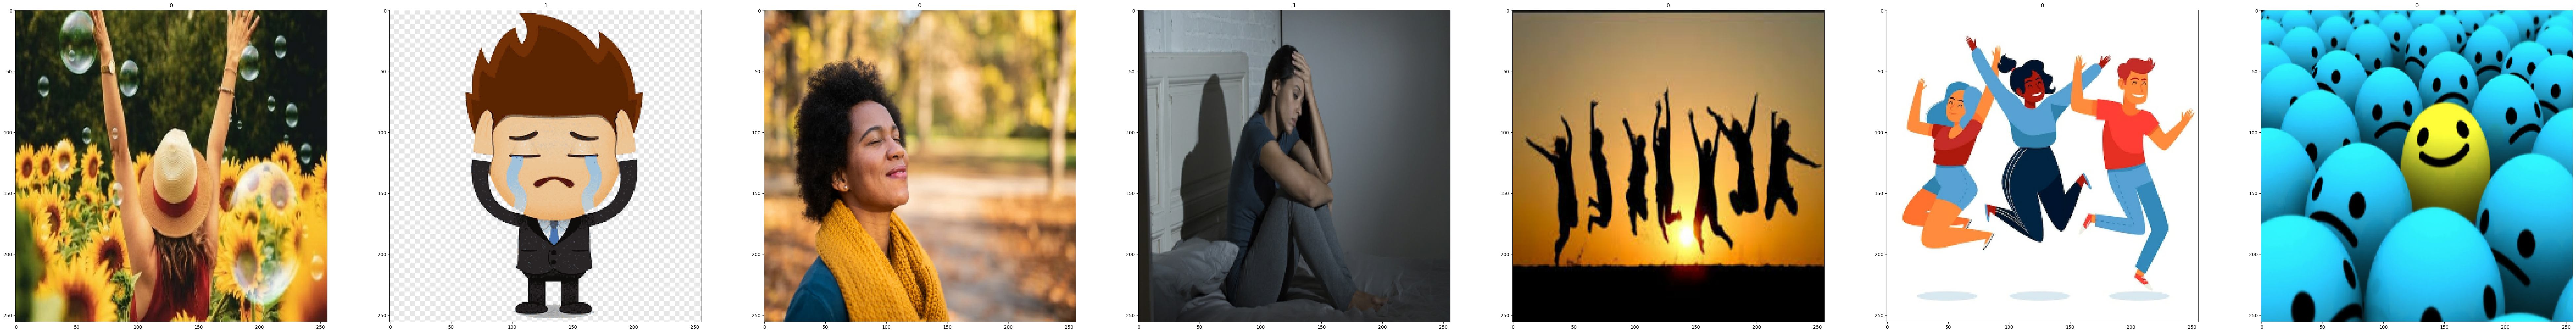

In [19]:
fig, ax = plt.subplots(ncols=7, figsize=(100,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
batch[1]

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [21]:
data = data.map(lambda x,y: (x/400, y))

In [22]:
scaled_iterator=data.as_numpy_iterator()

In [23]:
batch=scaled_iterator.next()

In [24]:
batch[1].max()

1

In [25]:
batch[1].min()

0

In [26]:
len(data)

8

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [28]:
train_size+val_size+test_size

7

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile('Adamax', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 13s 2s/step - loss: 0.7172 - accuracy: 0.5250 - val_loss: 0.6649 - val_accuracy: 0.7812
Epoch 2/20
5/5 [==============================] - 8s 1s/step - loss: 0.6480 - accuracy: 0.6812 - val_loss: 0.5395 - val_accuracy: 0.7188
Epoch 3/20
5/5 [==============================] - 8s 1s/step - loss: 0.5816 - accuracy: 0.6625 - val_loss: 0.5705 - val_accuracy: 0.6562
Epoch 4/20
5/5 [==============================] - 8s 1s/step - loss: 0.5616 - accuracy: 0.7063 - val_loss: 0.4740 - val_accuracy: 0.8750
Epoch 5/20
5/5 [==============================] - 8s 1s/step - loss: 0.4965 - accuracy: 0.7563 - val_loss: 0.4607 - val_accuracy: 0.8125
Epoch 6/20
5/5 [==============================] - 8s 1s/step - loss: 0.4677 - accuracy: 0.7563 - val_loss: 0.4357 - val_accuracy: 0.8438
Epoch 7/20
5/5 [==============================] - 8s 1s/step - loss: 0.4013 - accuracy: 0.8687 - val_loss: 0.3533 - val_accuracy: 0.8750
Epoch 8/20
5/5 [========================

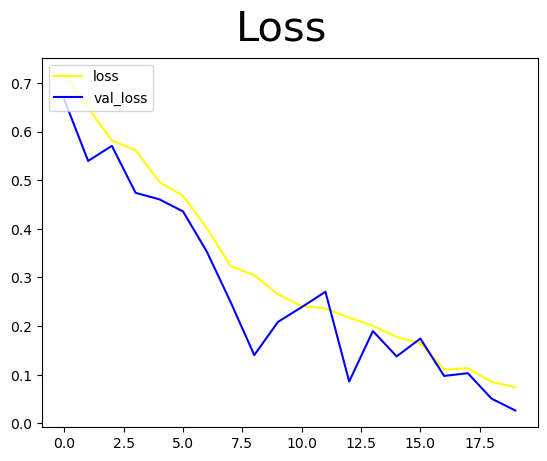

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='yellow', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=30)
plt.legend(loc="upper left")
plt.show()

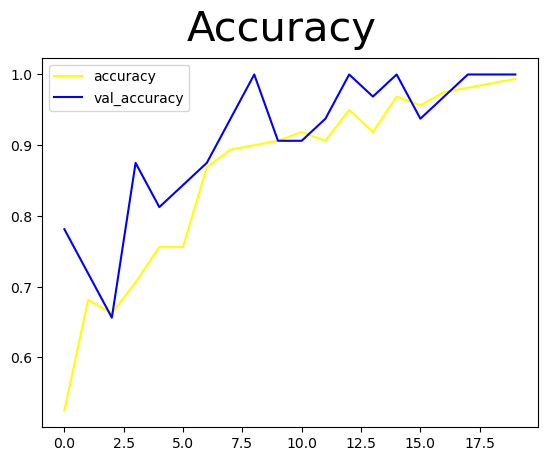

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='yellow', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=30)
plt.legend(loc="upper left")
plt.show()

In [49]:
len(test)





1

In [61]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [63]:
pre = Precision() 
re = Recall()
acc = BinaryAccuracy()

In [65]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat=model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    print(f'Precision:{pre.result().numpy()},     Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

1/1 [==============================] - 0s 279ms/step
Precision:1.0,     Recall:1.0, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


In [67]:
import cv2

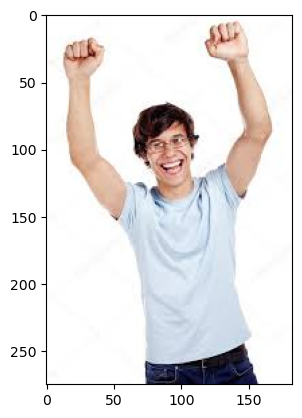

In [75]:
img = cv2.imread(r"C:\Users\khush\Downloads\happyx.jpg.jpg") 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

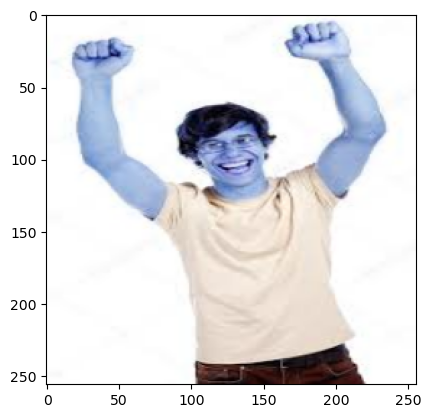

In [77]:
resize = tf.image.resize(img, (256,256)) 
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
resize.shape

TensorShape([256, 256, 3])

In [85]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [89]:
yhat=model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 218ms/step


In [91]:
yhat

array([[0.11322288]], dtype=float32)

In [98]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
     print(f'Predicted class is Happy')
   

Predicted class is Happy
